In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_parquet("/home/rzby/airpressure_ann/ann_pressure_prediction/data/raw/synop_97430_babullah.parquet")
df.head()

,WMO_ID,DATA_TIMESTAMP,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED
0,97430,2024-12-31 23:00:00+00:00,NaN,25.1,26.2,25.4,7.0,94.0,1011.5,1007.6
1,97430,2024-12-31 22:00:00+00:00,NaN,24.4,25.8,24.8,6.0,92.0,1010.7,1006.8
2,97430,2024-12-31 21:00:00+00:00,5.6,24.0,25.4,24.4,5.0,92.0,1009.7,1005.8
3,97430,2024-12-31 20:00:00+00:00,NaN,24.0,25.4,24.4,5.0,92.0,1008.9,1005.0
4,97430,2024-12-31 19:00:00+00:00,NaN,24.2,25.6,24.6,0.0,92.0,1008.9,1005.0


In [3]:
for nama in df.columns.values:
    print(nama)

WMO_ID
DATA_TIMESTAMP
RAINFALL_LAST_MM
TEMP_DEWPOINT_C_TDTDTD
TEMP_DRYBULB_C_TTTTTT
TEMP_WETBULB_C
WIND_SPEED_FF
RELATIVE_HUMIDITY_PC
PRESSURE_QFF_MB_DERIVED
PRESSURE_QFE_MB_DERIVED


In [4]:
df.loc[df.duplicated('DATA_TIMESTAMP')].sort_values(by='DATA_TIMESTAMP')

,WMO_ID,DATA_TIMESTAMP,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED


In [ ]:
df.drop_duplicates(subset=['DATA_TIMESTAMP'], keep='first', inplace=True)

In [5]:
df['ts'] = pd.to_datetime(df['DATA_TIMESTAMP'], utc=True)
df = df.set_index('ts').sort_index()
df.head()

,WMO_ID,DATA_TIMESTAMP,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED
ts,,,,,,,,,,
2015-01-01 00:00:00+00:00,97430,2015-01-01 00:00:00+00:00,0.0,24.9,27.6,25.6,4.0,85.2,1011.1,1007.2
2015-01-01 01:00:00+00:00,97430,2015-01-01 01:00:00+00:00,NaN,25.5,29.0,26.4,11.0,81.5,1010.5,1006.6
2015-01-01 02:00:00+00:00,97430,2015-01-01 02:00:00+00:00,NaN,25.8,29.8,26.8,11.0,79.2,1010.2,1006.3
2015-01-01 03:00:00+00:00,97430,2015-01-01 03:00:00+00:00,NaN,25.7,30.2,26.8,13.0,76.7,1009.7,1005.8
2015-01-01 04:00:00+00:00,97430,2015-01-01 04:00:00+00:00,NaN,25.8,30.6,27.0,13.0,75.6,1009.0,1005.1


In [ ]:
df = df.drop(columns=['DATA_TIMESTAMP'])

In [6]:
df.replace(to_replace={
    8888: 0.01,
    9999: np.nan
}, inplace=True)

In [7]:
FULL_IDX = pd.date_range(
    start="2015-01-01 00:00",
    end = "2024-12-31 21:00",
    freq="3h",
    tz="utc"
)
df_full = df.reindex(FULL_IDX)
df_full.head()

,WMO_ID,DATA_TIMESTAMP,RAINFALL_LAST_MM,TEMP_DEWPOINT_C_TDTDTD,TEMP_DRYBULB_C_TTTTTT,TEMP_WETBULB_C,WIND_SPEED_FF,RELATIVE_HUMIDITY_PC,PRESSURE_QFF_MB_DERIVED,PRESSURE_QFE_MB_DERIVED
2015-01-01 00:00:00+00:00,97430,2015-01-01 00:00:00+00:00,0.0,24.9,27.6,25.6,4.0,85.2,1011.1,1007.2
2015-01-01 03:00:00+00:00,97430,2015-01-01 03:00:00+00:00,NaN,25.7,30.2,26.8,13.0,76.7,1009.7,1005.8
2015-01-01 06:00:00+00:00,97430,2015-01-01 06:00:00+00:00,NaN,24.9,29.2,26.0,10.0,77.6,1007.9,1004.0
2015-01-01 09:00:00+00:00,97430,2015-01-01 09:00:00+00:00,0.0,25.0,28.2,25.8,7.0,82.6,1008.2,1004.3
2015-01-01 12:00:00+00:00,97430,2015-01-01 12:00:00+00:00,0.0,24.8,27.2,25.4,5.0,86.6,1010.5,1006.6


In [8]:
df_full[df_full['WMO_ID'].isna()]['WMO_ID'] = '97430'

In [9]:
df_full['WMO_ID'] = df_full['WMO_ID'].astype(str)

In [10]:
print(f"Expected rows: {len(FULL_IDX):,}")
print(f"Actual rows  : {len(df_full):,}")

missing_pct = df_full.isna().mean().mul(100).round(2)
display(missing_pct.sort_values(ascending=False).head(10))


Expected rows: 29,224
Actual rows  : 29,224


RAINFALL_LAST_MM           5.71
WMO_ID                     0.00
DATA_TIMESTAMP             0.00
TEMP_DEWPOINT_C_TDTDTD     0.00
TEMP_DRYBULB_C_TTTTTT      0.00
TEMP_WETBULB_C             0.00
WIND_SPEED_FF              0.00
RELATIVE_HUMIDITY_PC       0.00
PRESSURE_QFF_MB_DERIVED    0.00
PRESSURE_QFE_MB_DERIVED    0.00
dtype: float64

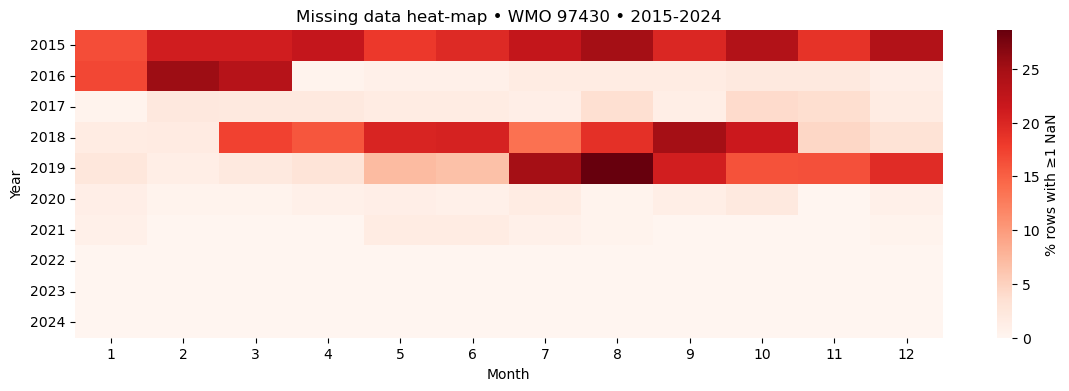

In [11]:
# Build a Y–M matrix of missing-row counts (any NaN in the row counts as missing)
mask_any_na = df_full.isna().any(axis=1)
miss_tbl = (
    mask_any_na.groupby([df_full.index.year, df_full.index.month])
    .mean()
    .unstack(level=1) * 100
)

plt.figure(figsize=(14,4))
sns.heatmap(miss_tbl, cmap="Reds", cbar_kws={"label":"% rows with ≥1 NaN"})
plt.title("Missing data heat-map • WMO 97430 • 2015-2024")
plt.ylabel("Year"); plt.xlabel("Month"); plt.show()


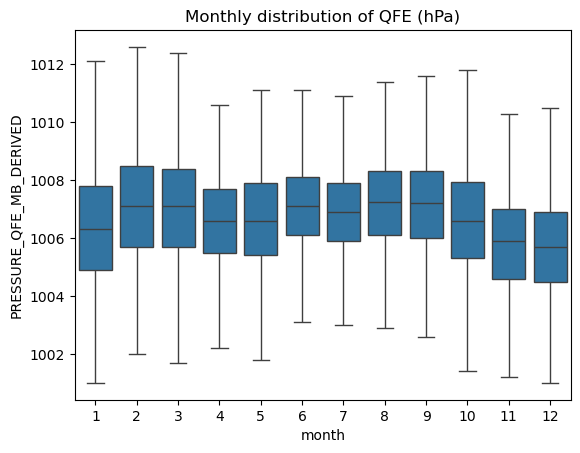

In [12]:
df_full['month'] = df_full.index.month
sns.boxplot(x='month', y='PRESSURE_QFE_MB_DERIVED', data=df_full, showfliers=False)
plt.title("Monthly distribution of QFE (hPa)")
plt.show()

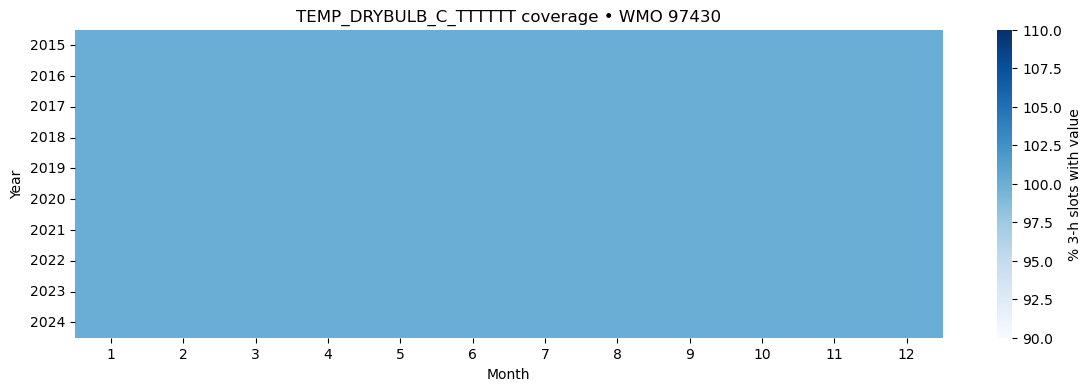

In [14]:
rain = df_full['TEMP_DRYBULB_C_TTTTTT']
# Percentage of slots that have rainfall values each month
rain_pct = (
    rain.notna()
        .groupby([df_full.index.year, df_full.index.month])
        .mean()
        .unstack(level=1) * 100
)

plt.figure(figsize=(14,4))
sns.heatmap(rain_pct, cmap="Blues", cbar_kws={"label":"% 3-h slots with value"})
plt.title("TEMP_DRYBULB_C_TTTTTT coverage • WMO 97430")
plt.ylabel("Year"); plt.xlabel("Month"); plt.show()


In [15]:
from pathlib import Path
OUTFILE = Path("/home/rzby/airpressure_ann/ann_pressure_prediction/data/interim/three_h-97430.parquet")
df_full.to_parquet(OUTFILE)